<b>BANK MARKETING

<b>PART 1. DATA WRANGLING

In [159]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [160]:
# load the data file
df = pd.read_csv('bank-additional-full.csv', sep=';')

In [161]:
# explore the data
df.shape

(41188, 21)

In [163]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [164]:
#summary statistics
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [165]:
# find percentage of 'unknown' values for each column.
print("Number of missing values in each column:")
for i in range(df.shape[1]):
    a = df.iloc[:,i][df.iloc[:,i] == 'unknown'].shape[0]
    print(df.columns.get_values()[i], ":", round(a/df.shape[0]*100, 2), "%")

Number of missing values in each column:
age : 0.0 %
job : 0.8 %
marital : 0.19 %
education : 4.2 %
default : 20.87 %
housing : 2.4 %
loan : 2.4 %
contact : 0.0 %
month : 0.0 %
day_of_week : 0.0 %
duration : 0.0 %
campaign : 0.0 %
pdays : 0.0 %
previous : 0.0 %
poutcome : 0.0 %
emp.var.rate : 0.0 %
cons.price.idx : 0.0 %
cons.conf.idx : 0.0 %
euribor3m : 0.0 %
nr.employed : 0.0 %
y : 0.0 %


In [166]:
# rename target variable 'y'.
df['subscribed'] = df['y']
df = df.drop(['y'], axis = 1)

<b> PART 2. EXPLORATORY DATA ANALYSIS

In [167]:
 # describe categorical and numeric columns. 
numeric_columns= ['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
categorical_columns = ['job', 'marital', 'education', 'default','housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

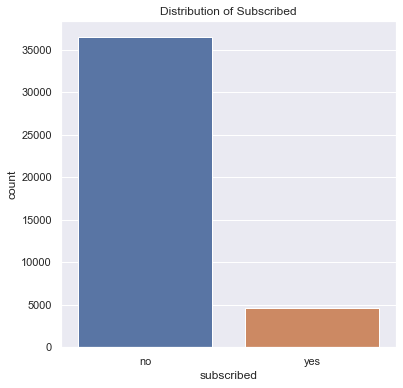

In [196]:
# explore the target variable.
plt.figure(figsize=(6,6))
sns.countplot(x= df.subscribed)
plt.title('Distribution of Subscribed')
plt.show()

In [173]:
print('Percentage of Values of Target Variable:')
df.subscribed.value_counts(normalize=True)

Percentage of Values of Target Variable:


no     0.887346
yes    0.112654
Name: subscribed, dtype: float64

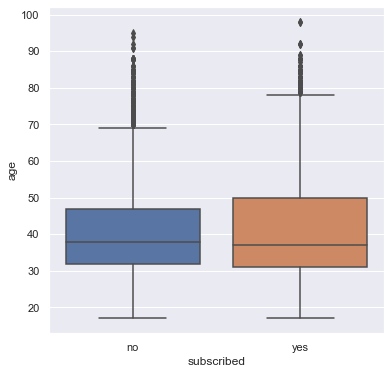

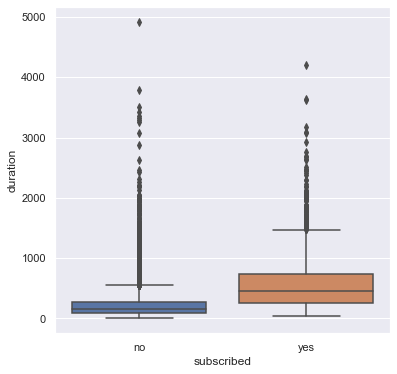

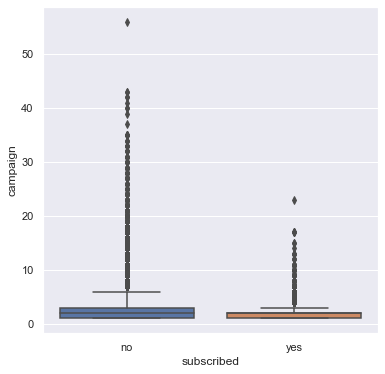

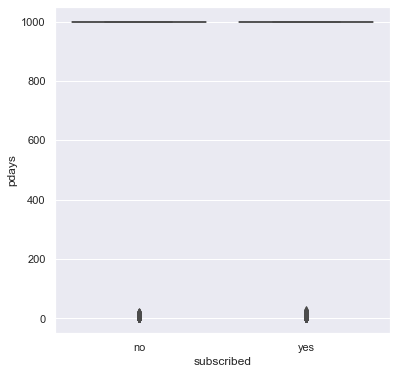

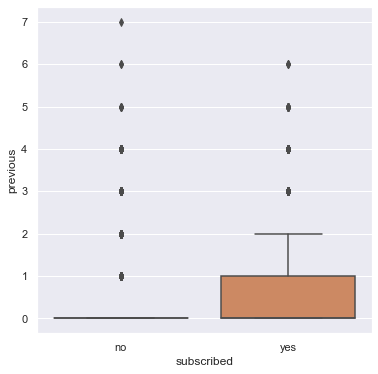

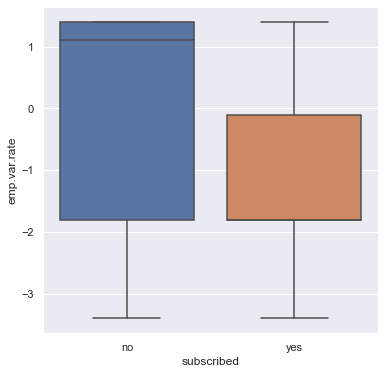

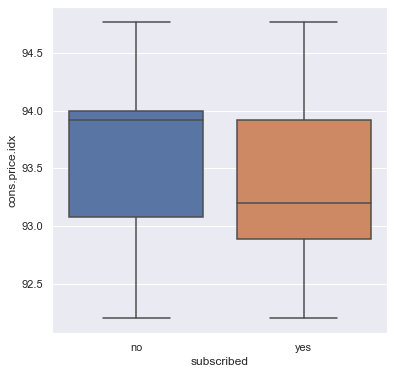

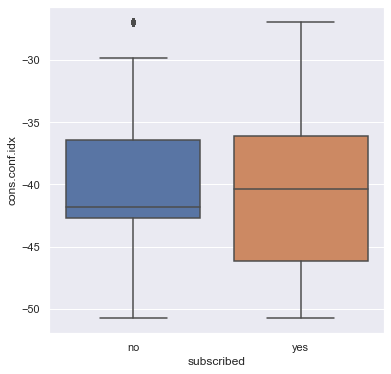

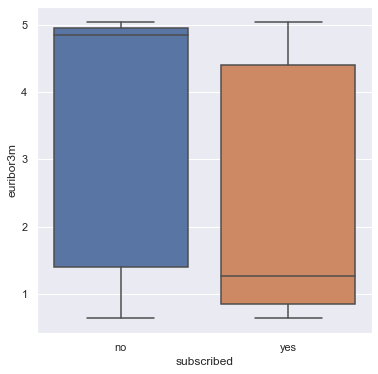

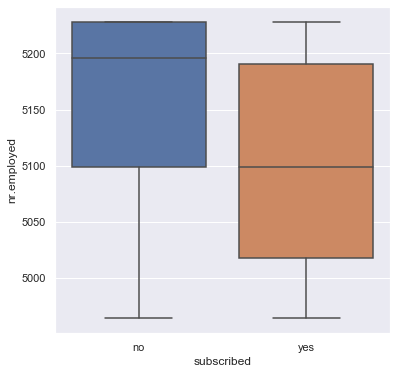

In [200]:
# explore the outlier using boxplots.
sns.set()
for column in numeric_columns:
    plt.figure(figsize=(6,6))
    sns.boxplot(x= 'subscribed', y= column, data = df)
    plt.show()

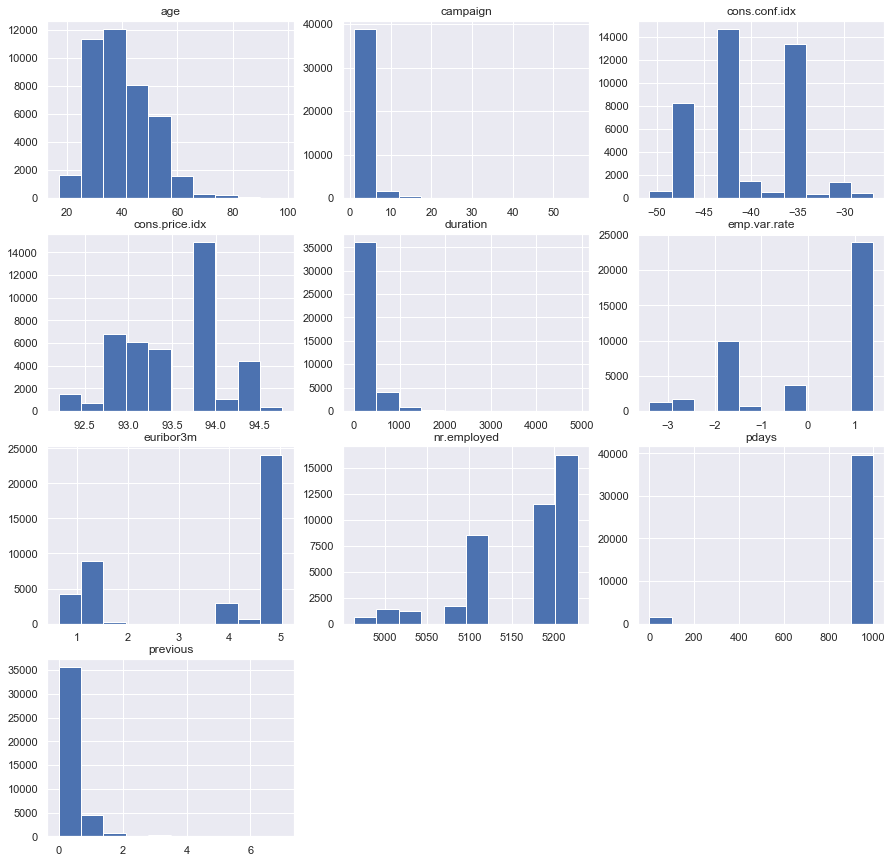

In [198]:
# explore the distribution of each numeric columns.
df.hist(column=numeric_columns,figsize=(15,15))
plt.subplots_adjust(wspace = 0.2, hspace = 0.2)
plt.show()

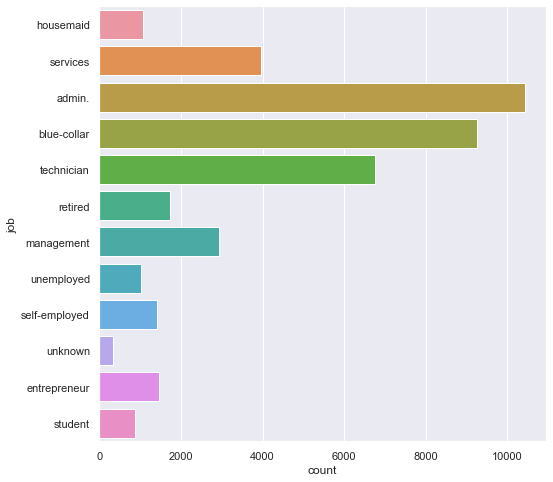

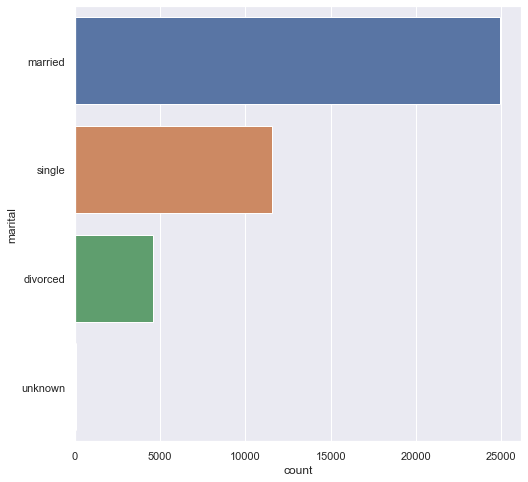

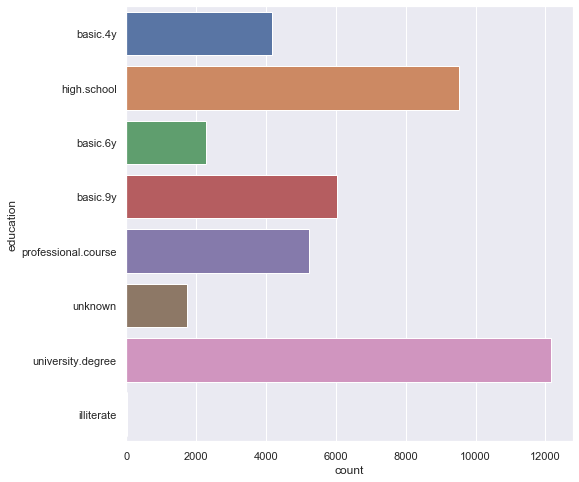

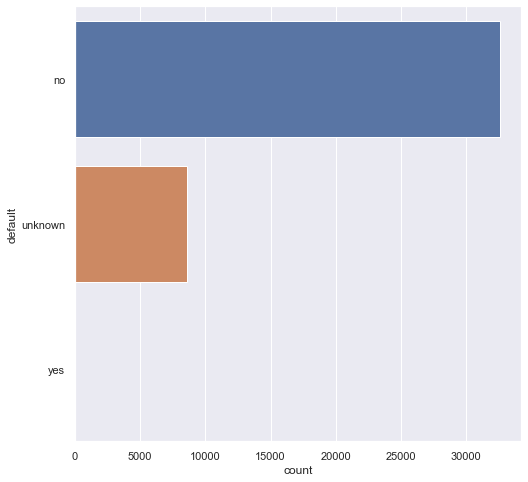

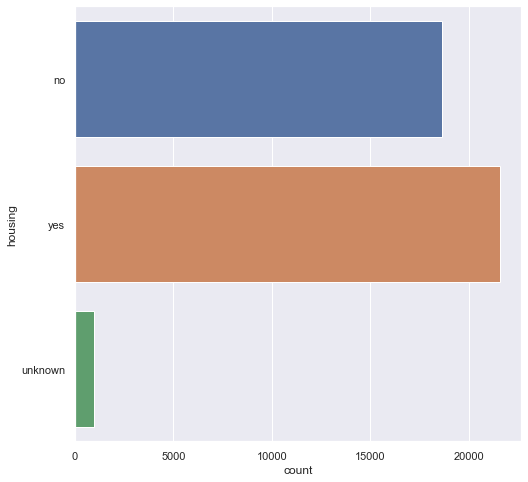

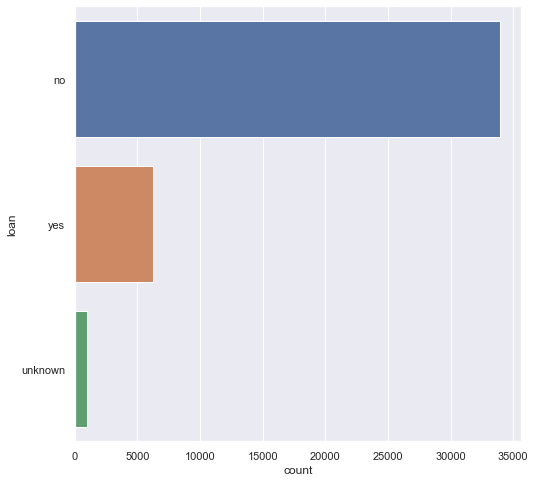

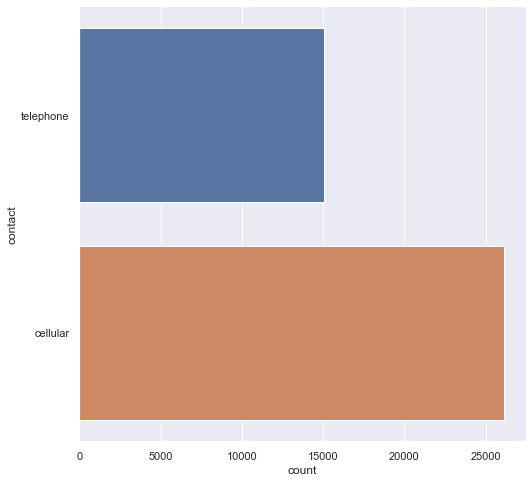

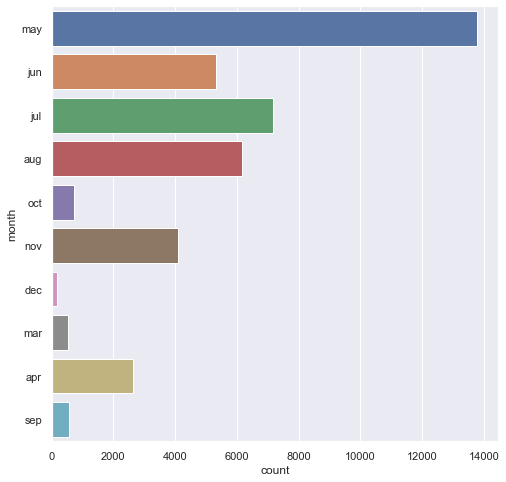

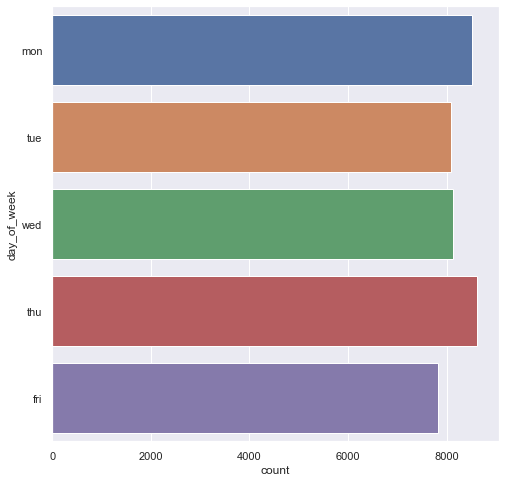

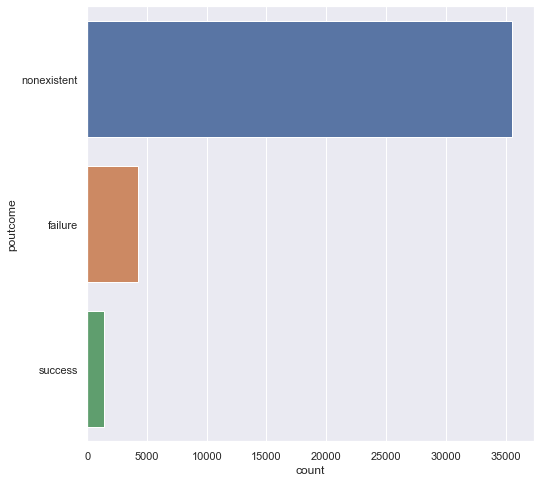

In [193]:
# explore the distribution of each categorical variables.
for column in categorical_columns:
    plt.figure(figsize=(8,8))
    sns.countplot(y=column, data=df)
    plt.show()

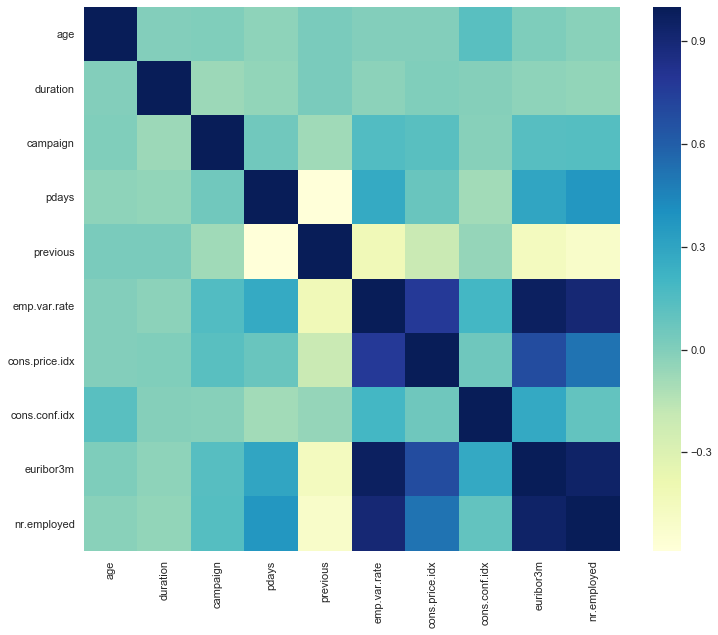

In [204]:
# visualize the correlation between numeric variables.
plt.figure(figsize = (12,10))
sns.heatmap(df.corr(), cmap="YlGnBu")
plt.show()

In [185]:
# drop missing values
# df = df[df != 'unknown']
# df = df.dropna()
# df.shape

In [93]:
# find and drop outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
# df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(20683, 21)